# Homework 4 Excercise 3

Brennan McFarland  
bfm21

In this excercise we will compute the principal components of the MNIST dataset, scatterplot them and plot the first few as images.

In [1]:
import gzip, pickle, numpy as np, matplotlib.pyplot as plt

## Loading Data

First we load the MNIST dataset for recognizing written numbers into a numpy array:

In [2]:
with gzip.open('data/mnist.pkl.gz', 'rb') as f:
    f = pickle._Unpickler(f)
    f.encoding = 'latin1'
    trainSet, validSet, testSet = f.load()
    mnistData = np.concatenate((trainSet[0], validSet[0], testSet[0]), axis=0)

## Principal Component Analysis

In [3]:
def showImageSamples(imageset, n, shape=[28,28], col=3, width=16, dispopt='gray', random=True):
    row    = np.ceil(n / col)
    height = np.around(row * (width / col))
    plt.figure(figsize=(width, height))
    subplotIndex = 100 * row + 10 * col + 1
    for i in range(n):
        if random:
            img = imageset[np.random.randint(len(imageset), size=1)]
        else:
            img = imageset[i]
        plt.subplot(subplotIndex + i)
        plt.imshow(img.reshape(shape), cmap=dispopt)

dimReducePCA, also in gmmlib, is what computes the principal components.  It uses sklearn to perform a PCA decomposition, returning the desired number of principal components (here 2).  It then calculates the eigenvectors and eigenvalues for the resulting covariance matrix once we fit the data to the decomposition.  showImageSamples displays the first PCs as images.  The eigenvectors and eigenvalues we will use later, in the next excercise.

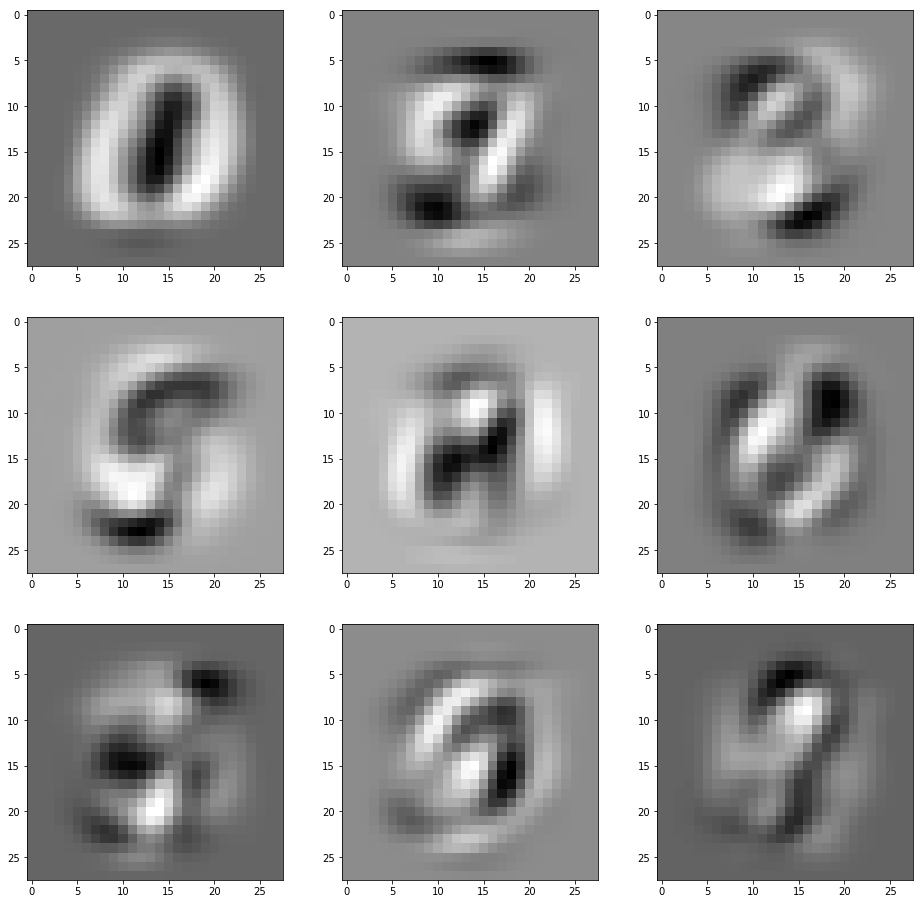

In [4]:
from gmmlib import dimReducePCA

# reduce the dimension of data to 2 using PCA
mnistData2D, eigenVectors, eigenValues = dimReducePCA(mnistData, 2)
showImageSamples(eigenVectors.T, 9, random=False)

Now that we've reduced our data to two dimensions, we can scatterplot it for easier visualization.  From this we can get a rough idea of the shape of the data:

In [5]:
def gmmplot(data, gmm):
    # plot data points
    plt.scatter(data[:, 0], data[:, 1], s=4)
    # plot Gaussian model
    color = 'rgb'
    for index, model in enumerate(gmm):
        plotGaussianModel2D(model['mean'], model['covariance'], colorPicker(index))


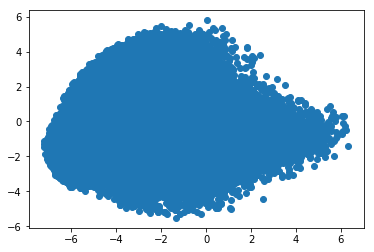

In [6]:
x0, x1 = np.zeros(len(mnistData2D)), np.zeros(len(mnistData2D))
for x in range(len(mnistData2D)):
    x0[x], x1[x] = mnistData2D[x][0], mnistData2D[x][1]
plt.scatter(x0, x1)
plt.show()